In [3]:
import numpy as np
from time import perf_counter

a = np.arange(1_000_000)
b = np.arange(1_000_000, 2_000_000)

# Vectorized
t0 = perf_counter()
c = a + b
t_vec = perf_counter() - t0

# Loop
t0 = perf_counter()
c2 = np.empty_like(a)
for i in range(len(a)):
    c2[i] = a[i] + b[i]
t_loop = perf_counter() - t0

print(f"Vectorized: {t_vec:.6f}s, Loop: {t_loop:.6f}s, Speedup ≈ {t_loop/t_vec:.1f}x")


Vectorized: 0.003293s, Loop: 0.205081s, Speedup ≈ 62.3x


In [5]:
!pip install pandas numpy matplotlib
import pandas as pd

df = pd.read_csv("data/starter_data.csv", parse_dates=["date"])
df.info()
df.head()


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 77.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 83.4 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [matplotlib]0 [matplotlib]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


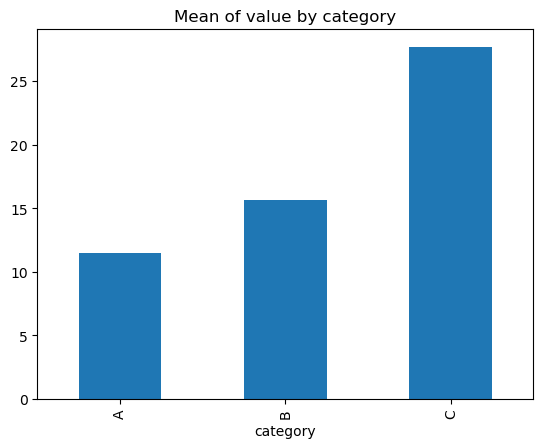

In [7]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.utils import get_summary_stats

summary = get_summary_stats(df)
summary

grouped = get_summary_stats(df, group_col="category")
grouped

out_dir = "data/processed"
summary.to_csv(f"{out_dir}/summary.csv")

means = df.groupby("category")["value"].mean()
import matplotlib.pyplot as plt
means.plot(kind="bar", title="Mean of value by category").get_figure().savefig(f"{out_dir}/group_means.png")

